***Sobre o conjunto de dados***

O Amazon Prime Users Dataset contém informações sobre 2500 usuários fictícios do serviço de assinatura Amazon Prime. Cada entrada no conjunto de dados inclui detalhes como nome do usuário, endereço de e-mail, localização, plano de assinatura, informações de pagamento e métricas de engajamento. Além disso, dados demográficos como gênero e data de nascimento são fornecidos, juntamente com as preferências do usuário, como gêneros favoritos e dispositivos usados ​​para acessar a plataforma.

O conjunto de dados visa representar uma gama diversificada de usuários Prime, incluindo diferentes dados demográficos, planos de assinatura e padrões de uso. Ele foi projetado para facilitar a análise e os insights sobre o comportamento do usuário, preferências e interações com a plataforma Amazon Prime. Pesquisadores e analistas podem usar esse conjunto de dados para estudar tendências, conduzir campanhas de marketing direcionadas e melhorar a experiência do usuário na plataforma.

Observe que este conjunto de dados contém dados fictícios gerados apenas para fins ilustrativos e não representam usuários reais do Amazon Prime.

***1º OBJETIVO DA ANÁLISE***

 - “Analisar o engajamento e a retenção de usuários para identificar fatores que influenciam a continuidade das assinaturas do Amazon Prime.”

In [1]:
# Importando as bibliotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

In [2]:
# Importando a base de dados
df = pd.read_csv('amazon_prime_users.csv')


In [3]:
# Visualizando a base de dados
display(df)

,User ID,Name,Email Address,Username,Date of Birth,Gender,Location,Membership Start Date,Membership End Date,Subscription Plan,Payment Information,Renewal Status,Usage Frequency,Purchase History,Favorite Genres,Devices Used,Engagement Metrics,Feedback/Ratings,Customer Support Interactions
0,1,Ronald Murphy,williamholland@example.com,williamholland,1953-06-03,Male,Rebeccachester,2024-01-15,2025-01-14,Annual,Mastercard,Manual,Regular,Electronics,Documentary,Smart TV,Medium,3.6,3
1,2,Scott Allen,scott22@example.org,scott22,1978-07-08,Male,Mcphersonview,2024-01-07,2025-01-06,Monthly,Visa,Manual,Regular,Electronics,Horror,Smartphone,Medium,3.8,7
2,3,Jonathan Parrish,brooke16@example.org,brooke16,1994-12-06,Female,Youngfort,2024-04-13,2025-04-13,Monthly,Mastercard,Manual,Regular,Books,Comedy,Smart TV,Low,3.3,8
3,4,Megan Williams,elizabeth31@example.net,elizabeth31,1964-12-22,Female,Feliciashire,2024-01-24,2025-01-23,Monthly,Amex,Auto-renew,Regular,Electronics,Documentary,Smart TV,High,3.3,7
4,5,Kathryn Brown,pattersonalexandra@example.org,pattersonalexandra,1961-06-04,Male,Port Deborah,2024-02-14,2025-02-13,Annual,Visa,Auto-renew,Frequent,Clothing,Drama,Smart TV,Low,4.3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2495,2496,Michael Lopez,williamsroberto@example.org,williamsroberto,1967-08-19,Male,Smithport,2024-01-25,2025-01-24,Annual,Visa,Auto-renew,Frequent,Electronics,Comedy,Smartphone,Medium,4.9,2
2496,2497,Matthew Woodard,lkaiser@example.com,lkaiser,1980-10-23,Male,Ethanport,2024-03-03,2025-03-03,Annual,Amex,Manual,Frequent,Books,Comedy,Smart TV,Medium,4.0,0
2497,2498,Morgan Barnes,erikaholland@example.net,erikaholland,1972-03-31,Female,Alexandraborough,2024-02-09,2025-02-08,Annual,Visa,Manual,Frequent,Electronics,Documentary,Tablet,Low,4.9,8
2498,2499,Gina Castaneda,reedcourtney@example.net,reedcourtney,1965-08-02,Female,Williammouth,2024-02-18,2025-02-17,Monthly,Visa,Manual,Regular,Clothing,Comedy,Smartphone,High,3.4,7


***2º Tratando a Base de Dados***

In [4]:
# Verificando o tipo das variavéis
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 19 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   User ID                        2500 non-null   int64  
 1   Name                           2500 non-null   object 
 2   Email Address                  2500 non-null   object 
 3   Username                       2500 non-null   object 
 4   Date of Birth                  2500 non-null   object 
 5   Gender                         2500 non-null   object 
 6   Location                       2500 non-null   object 
 7   Membership Start Date          2500 non-null   object 
 8   Membership End Date            2500 non-null   object 
 9   Subscription Plan              2500 non-null   object 
 10  Payment Information            2500 non-null   object 
 11  Renewal Status                 2500 non-null   object 
 12  Usage Frequency                2500 non-null   o

In [5]:
# Removendo as colunas desnecessárias
df = df.drop(columns=['User ID','Name','Email Address','Username'])

In [6]:
# Criando uma coluna de duração, para exemplificar a data de início e de término de assinatura
df['Membership Start Date'] = pd.to_datetime(df['Membership Start Date'])
df['Membership End Date'] = pd.to_datetime(df['Membership End Date'])

df['Duration'] = (df['Membership End Date'] - df['Membership Start Date'])

In [7]:
# Convertendo o tipo da coluna Date of Birth 
df['Date of Birth'] = pd.to_datetime(df['Date of Birth'])

In [8]:
# Verificando o tipo das colunas 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 16 columns):
 #   Column                         Non-Null Count  Dtype          
---  ------                         --------------  -----          
 0   Date of Birth                  2500 non-null   datetime64[ns] 
 1   Gender                         2500 non-null   object         
 2   Location                       2500 non-null   object         
 3   Membership Start Date          2500 non-null   datetime64[ns] 
 4   Membership End Date            2500 non-null   datetime64[ns] 
 5   Subscription Plan              2500 non-null   object         
 6   Payment Information            2500 non-null   object         
 7   Renewal Status                 2500 non-null   object         
 8   Usage Frequency                2500 non-null   object         
 9   Purchase History               2500 non-null   object         
 10  Favorite Genres                2500 non-null   object         
 11  Devi

In [9]:
# Avaliando a variavél duration
display(df)

,Date of Birth,Gender,Location,Membership Start Date,Membership End Date,Subscription Plan,Payment Information,Renewal Status,Usage Frequency,Purchase History,Favorite Genres,Devices Used,Engagement Metrics,Feedback/Ratings,Customer Support Interactions,Duration
0,1953-06-03,Male,Rebeccachester,2024-01-15,2025-01-14,Annual,Mastercard,Manual,Regular,Electronics,Documentary,Smart TV,Medium,3.6,3,365 days
1,1978-07-08,Male,Mcphersonview,2024-01-07,2025-01-06,Monthly,Visa,Manual,Regular,Electronics,Horror,Smartphone,Medium,3.8,7,365 days
2,1994-12-06,Female,Youngfort,2024-04-13,2025-04-13,Monthly,Mastercard,Manual,Regular,Books,Comedy,Smart TV,Low,3.3,8,365 days
3,1964-12-22,Female,Feliciashire,2024-01-24,2025-01-23,Monthly,Amex,Auto-renew,Regular,Electronics,Documentary,Smart TV,High,3.3,7,365 days
4,1961-06-04,Male,Port Deborah,2024-02-14,2025-02-13,Annual,Visa,Auto-renew,Frequent,Clothing,Drama,Smart TV,Low,4.3,1,365 days
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2495,1967-08-19,Male,Smithport,2024-01-25,2025-01-24,Annual,Visa,Auto-renew,Frequent,Electronics,Comedy,Smartphone,Medium,4.9,2,365 days
2496,1980-10-23,Male,Ethanport,2024-03-03,2025-03-03,Annual,Amex,Manual,Frequent,Books,Comedy,Smart TV,Medium,4.0,0,365 days
2497,1972-03-31,Female,Alexandraborough,2024-02-09,2025-02-08,Annual,Visa,Manual,Frequent,Electronics,Documentary,Tablet,Low,4.9,8,365 days
2498,1965-08-02,Female,Williammouth,2024-02-18,2025-02-17,Monthly,Visa,Manual,Regular,Clothing,Comedy,Smartphone,High,3.4,7,365 days


In [10]:
# Removendo as colunas desnecessárias
df = df.drop(columns=['Membership Start Date','Membership End Date'])

In [11]:
# Verificando o tipo das variavéis e a quantidade de variavéis
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 14 columns):
 #   Column                         Non-Null Count  Dtype          
---  ------                         --------------  -----          
 0   Date of Birth                  2500 non-null   datetime64[ns] 
 1   Gender                         2500 non-null   object         
 2   Location                       2500 non-null   object         
 3   Subscription Plan              2500 non-null   object         
 4   Payment Information            2500 non-null   object         
 5   Renewal Status                 2500 non-null   object         
 6   Usage Frequency                2500 non-null   object         
 7   Purchase History               2500 non-null   object         
 8   Favorite Genres                2500 non-null   object         
 9   Devices Used                   2500 non-null   object         
 10  Engagement Metrics             2500 non-null   object         
 11  Feed

In [12]:
# Verificando a presença de valores nulos e duplicados
valores_nulos = df.isnull().sum()

print(f'A quantidade de valores nulos é: \n', valores_nulos)
print('____________________________________________________')

valores_duplicados = df.duplicated().sum()

print(f'A Quantidade de valores duplicados é: ', valores_duplicados)

A quantidade de valores nulos é: 
 Date of Birth                    0
Gender                           0
Location                         0
Subscription Plan                0
Payment Information              0
Renewal Status                   0
Usage Frequency                  0
Purchase History                 0
Favorite Genres                  0
Devices Used                     0
Engagement Metrics               0
Feedback/Ratings                 0
Customer Support Interactions    0
Duration                         0
dtype: int64
____________________________________________________
A Quantidade de valores duplicados é:  0


***3º ANÁLISE EXPLORATÓRIA DOS DADOS***

Qual é a distribuição dos gêneros e como eles estão relacionados ao nível de engajamento?
Alinhado com métricas de engajamento e características demográficas.

Qual é a distribuição de idades e qual faixa etária apresenta maior nível de engajamento e retenção?
Relaciona demografia com engajamento e taxas de retenção.

Quais países ou locais possuem maior concentração de planos e como variam as taxas de renovação de assinaturas por região?
Excelente combinação de localização e renovação de assinaturas.

Qual é a relação entre as estatísticas de engajamento e os diferentes tipos de planos de assinatura (mensal vs anual)?
Bem direcionado para explorar o impacto do tipo de plano no comportamento.

Como os gêneros de conteúdo favoritos variam entre as faixas etárias, e como isso afeta o engajamento?
Aprofunda a análise cruzando interesses de conteúdo com demografia e comportamento.

Existe relação entre o tempo médio de uso da plataforma e os níveis de engajamento dos usuários?
Explora comportamento e retenção com base no tempo médio de uso.

Qual é a distribuição das avaliações (comentários) fornecidas pelos usuários e como elas estão relacionadas às interações com o suporte?
Ótimo para entender a satisfação do cliente e a qualidade do suporte.

Qual tipo de plano apresenta maior número de interações com o suporte?
Relaciona o plano com o volume de necessidades de suporte, um insight operacional importante.

Quais são os dispositivos mais usados ​​pelos usuários e o tipo de dispositivo que influencia o nível de engajamento?
Uma análise interessante para melhorar a experiência do usuário em dispositivos populares.

Quais são os padrões mais comuns no histórico de compras? Usuários com maior frequência de uso são os que mais compram? Qual método de pagamento é mais utilizado?
Cobre comportamento de compras e preferências de pagamento, vinculando ao uso

In [13]:
# Análise descritiva
df.describe()

,Date of Birth,Feedback/Ratings,Customer Support Interactions,Duration
count,2500,2500.000000,2500.000000,2500
mean,1969-10-10 10:15:10.080000,4.004760,4.951600,365 days 00:00:00
min,1933-04-26 00:00:00,3.000000,0.000000,365 days 00:00:00
25%,1951-04-30 00:00:00,3.500000,2.000000,365 days 00:00:00
50%,1969-12-07 12:00:00,4.000000,5.000000,365 days 00:00:00
75%,1988-03-28 06:00:00,4.500000,8.000000,365 days 00:00:00
max,2006-04-11 00:00:00,5.000000,10.000000,365 days 00:00:00
std,NaN,0.580769,3.191572,0 days 00:00:00


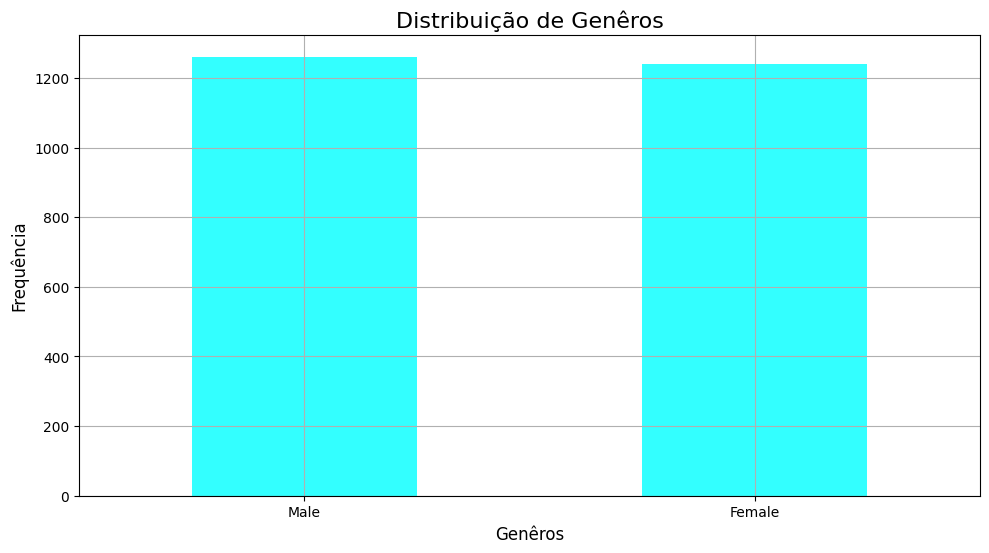

In [14]:
# Qual é a distribuição dos gêneros e como eles estão relacionados ao nível de engajamento?
generos = df['Gender'].value_counts()

# Plotando o gráfico de distribuição dos genêros
plt.figure(figsize=(10,6))
generos.plot(kind='bar', color='Cyan', alpha=0.8)
plt.title('Distribuição de Genêros', fontsize=16)
plt.xlabel('Genêros', fontsize=12)
plt.ylabel('Frequência', fontsize=12)
plt.tight_layout()
plt.grid()
plt.xticks(rotation=0)
plt.show()

<Figure size 1400x800 with 0 Axes>

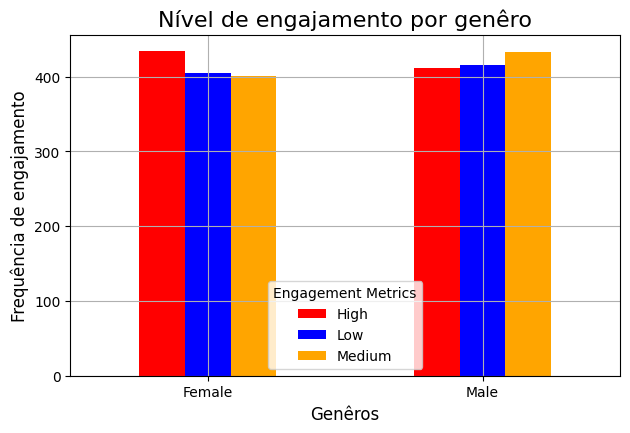

In [15]:
# Verificando o nível de engajamento por genêro
engajamento_por_genero = df.pivot_table(index='Gender', columns='Engagement Metrics', aggfunc='size', fill_value=0)

# Plotando o gráfico para verificar o engajamento
plt.figure(figsize=(14,8))
engajamento_por_genero.plot(kind='bar', stacked=False, color=['red','blue','orange'])
plt.title('Nível de engajamento por genêro', fontsize=16)
plt.xlabel('Genêros', fontsize=12)
plt.ylabel('Frequência de engajamento', fontsize=12)
plt.tight_layout()
plt.grid()
plt.xticks(rotation=0)
plt.show()


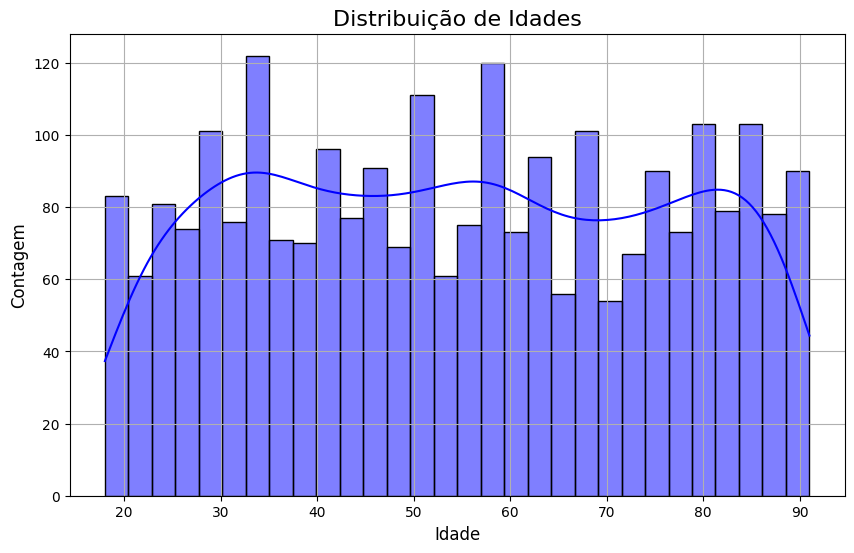

In [16]:
# Qual é a distribuição de idades e qual faixa etária apresenta maior nível de engajamento e retenção?

# Calcular a idade
current_year = datetime.now().year
df['Age'] = current_year - df['Date of Birth'].dt.year

# Plotando a distribuição de idades
plt.figure(figsize=(10,6))
sns.histplot(df['Age'], kde=True, bins=30, color='blue', edgecolor='black')
plt.title('Distribuição de Idades', fontsize=16)
plt.xlabel('Idade', fontsize=12)
plt.ylabel('Contagem', fontsize=12)
plt.grid(True)
plt.show()


In [17]:
# Criando a coluna de grupo de idades, contendo as faixas etárias
bins = [18, 25, 35, 45, 55, 60, 100] 
labels = ['18-25', '26-35', '36-45', '46-55', '56-60', '61+'] 
df['Age Group'] = pd.cut(df['Age'], labels=labels, bins=bins, right=False)

<Figure size 1600x1000 with 0 Axes>

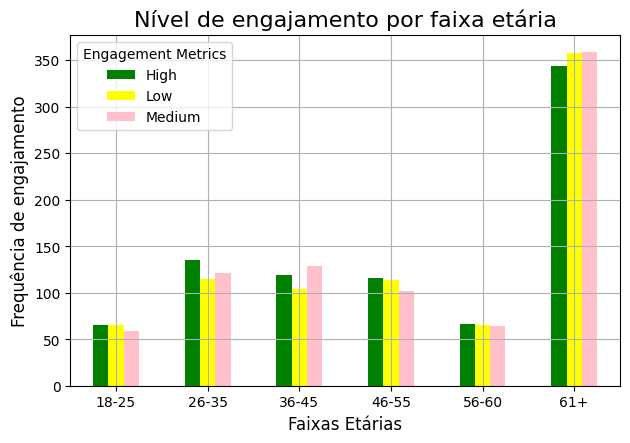

In [18]:
# verificando quais faixas etárias possuem maior nível de engajamento
engajamento_por_faixa_etaria = df.pivot_table(index='Age Group', columns='Engagement Metrics', aggfunc='size', fill_value=0)

# Plotando o gráfico para verificar o engajamento
plt.figure(figsize=(16,10))
engajamento_por_faixa_etaria.plot(kind='bar', stacked=False, color=['green','yellow','pink'])
plt.title('Nível de engajamento por faixa etária', fontsize=16)
plt.xlabel('Faixas Etárias', fontsize=12)
plt.ylabel('Frequência de engajamento', fontsize=12)
plt.tight_layout()
plt.grid()
plt.xticks(rotation=0)
plt.show()

C:\Users\55119\AppData\Local\Temp\ipykernel_25804\711750531.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  distribuicao_por_faixa_etaria = df.groupby('Age Group').size()


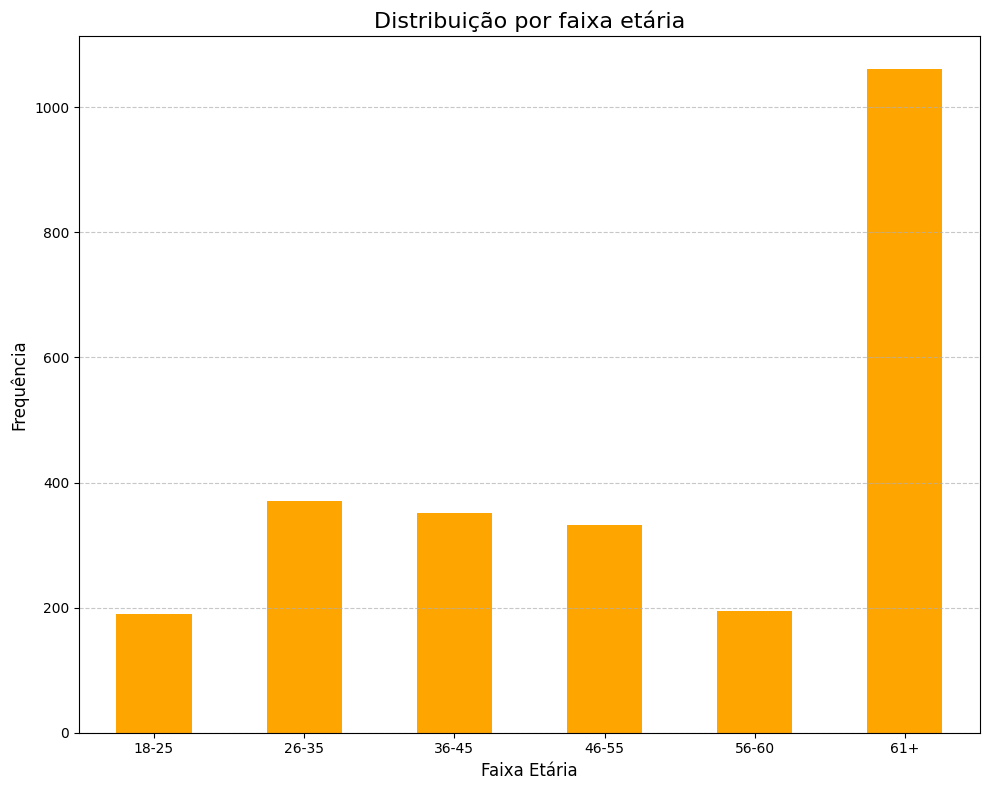

In [19]:
# Analisando a distribuição por faixa etária
distribuicao_por_faixa_etaria = df.groupby('Age Group').size()

# Plotando o gráfico de distribuição
plt.figure(figsize=(10, 8))
distribuicao_por_faixa_etaria.plot(kind='bar', color='orange')
plt.title('Distribuição por faixa etária', fontsize=16)
plt.xlabel('Faixa Etária', fontsize=12)
plt.ylabel('Frequência', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(rotation=0, fontsize=10)
plt.tight_layout()
plt.show()

In [20]:
display(df)

,Date of Birth,Gender,Location,Subscription Plan,Payment Information,Renewal Status,Usage Frequency,Purchase History,Favorite Genres,Devices Used,Engagement Metrics,Feedback/Ratings,Customer Support Interactions,Duration,Age,Age Group
0,1953-06-03,Male,Rebeccachester,Annual,Mastercard,Manual,Regular,Electronics,Documentary,Smart TV,Medium,3.6,3,365 days,71,61+
1,1978-07-08,Male,Mcphersonview,Monthly,Visa,Manual,Regular,Electronics,Horror,Smartphone,Medium,3.8,7,365 days,46,46-55
2,1994-12-06,Female,Youngfort,Monthly,Mastercard,Manual,Regular,Books,Comedy,Smart TV,Low,3.3,8,365 days,30,26-35
3,1964-12-22,Female,Feliciashire,Monthly,Amex,Auto-renew,Regular,Electronics,Documentary,Smart TV,High,3.3,7,365 days,60,61+
4,1961-06-04,Male,Port Deborah,Annual,Visa,Auto-renew,Frequent,Clothing,Drama,Smart TV,Low,4.3,1,365 days,63,61+
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2495,1967-08-19,Male,Smithport,Annual,Visa,Auto-renew,Frequent,Electronics,Comedy,Smartphone,Medium,4.9,2,365 days,57,56-60
2496,1980-10-23,Male,Ethanport,Annual,Amex,Manual,Frequent,Books,Comedy,Smart TV,Medium,4.0,0,365 days,44,36-45
2497,1972-03-31,Female,Alexandraborough,Annual,Visa,Manual,Frequent,Electronics,Documentary,Tablet,Low,4.9,8,365 days,52,46-55
2498,1965-08-02,Female,Williammouth,Monthly,Visa,Manual,Regular,Clothing,Comedy,Smartphone,High,3.4,7,365 days,59,56-60


<Figure size 1200x800 with 0 Axes>

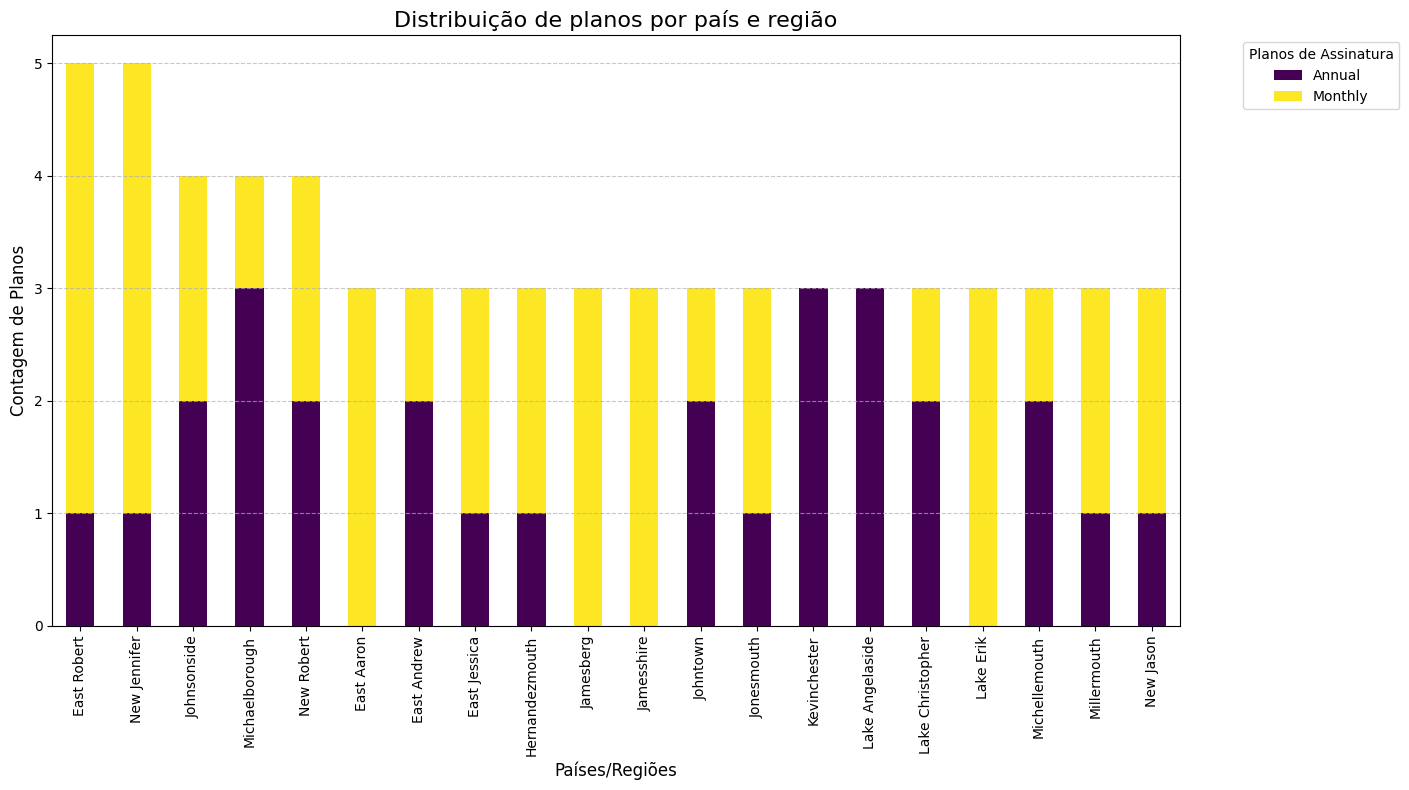

In [21]:
# Agrupando os dados por tipo de plano e localidade
planos_por_pais = df.groupby(['Location', 'Subscription Plan']).size().unstack()

# Somando os valores totais por localidade e filtrando os 20 maiores
top_20_locais = planos_por_pais.sum(axis=1).nlargest(20).index
planos_top_20 = planos_por_pais.loc[top_20_locais]

# Plotando o gráfico de distribuição de planos por localidade
plt.figure(figsize=(12, 8))
planos_top_20.plot(kind='bar', stacked=True, colormap='viridis', figsize=(12, 8))
plt.title('Distribuição de planos por país e região', fontsize=16)
plt.xlabel('Países/Regiões', fontsize=12)
plt.ylabel('Contagem de Planos', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(rotation=90, fontsize=10)
plt.tight_layout()
plt.legend(title='Planos de Assinatura', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

<Figure size 1500x1500 with 0 Axes>

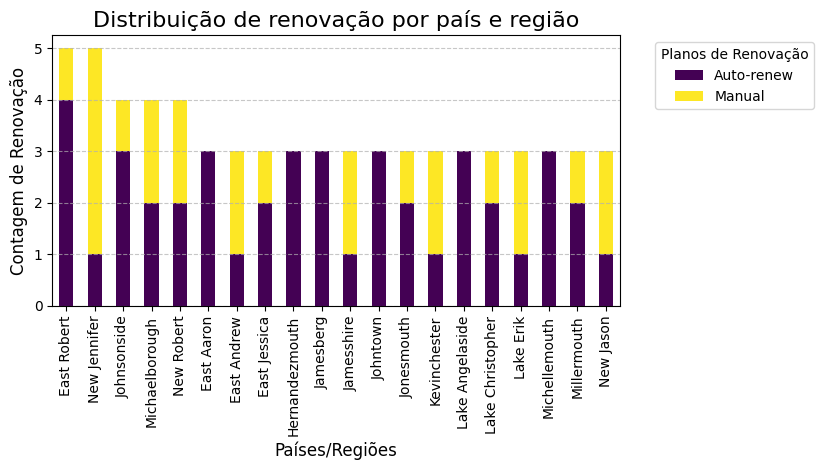

In [22]:
# Verificando a taxa de renovação por localidade
renovacao_por_localidade = df.groupby(['Location','Renewal Status']).size().unstack()

# Separando os 10 países com maior taxa de renovação
top_20_renovacao_por_pais = renovacao_por_localidade.sum(axis=1).nlargest(20).index
top_20_renovacao = renovacao_por_localidade.loc[top_20_renovacao_por_pais]
# Plotando o gráfico
plt.figure(figsize=(15,15))
top_20_renovacao.plot(kind='bar', stacked=True, colormap='viridis')
plt.title('Distribuição de renovação por país e região', fontsize=16)
plt.xlabel('Países/Regiões', fontsize=12)
plt.ylabel('Contagem de Renovação', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(rotation=90, fontsize=10)
plt.tight_layout()
plt.legend(title='Planos de Renovação', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

C:\Users\55119\AppData\Local\Temp\ipykernel_25804\2198556573.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Subscription Plan', y='Engagement Metrics Numeric', data=df, palette='Set2')


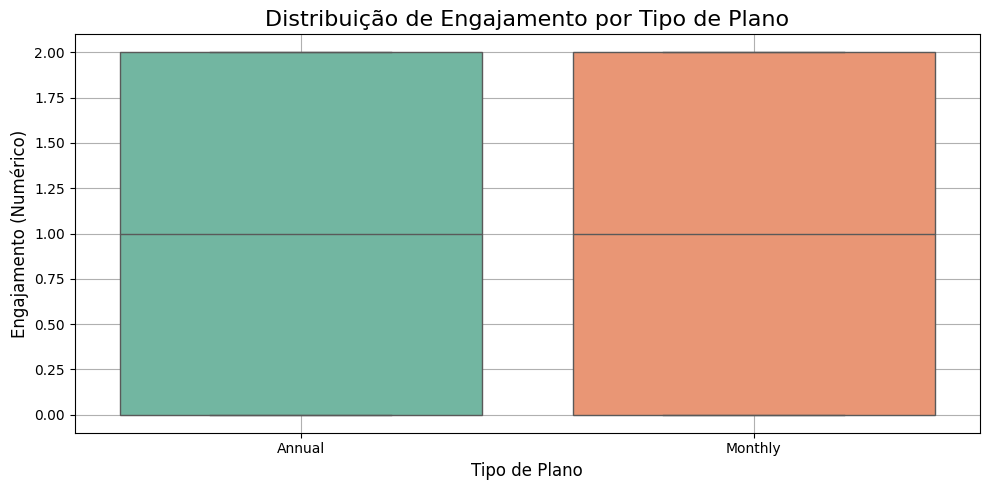

In [23]:
# Qual é a relação entre as estatísticas de engajamento e os diferentes tipos de planos de assinatura (mensal vs anual)?

# Mapeando os valores 'Low', 'Medium', 'High' para números
df['Engagement Metrics Numeric'] = df['Engagement Metrics'].map({'Low': 0, 'Medium': 1, 'High': 2})

# Plotando o boxplot para visualizar a distribuição de engajamento por tipo de plano
plt.figure(figsize=(10, 5))
sns.boxplot(x='Subscription Plan', y='Engagement Metrics Numeric', data=df, palette='Set2')
plt.title('Distribuição de Engajamento por Tipo de Plano', fontsize=16)
plt.xlabel('Tipo de Plano', fontsize=12)
plt.ylabel('Engajamento (Numérico)', fontsize=12)
plt.grid()
plt.tight_layout()
plt.show()


***Critérios:***

***Valor p < 0,05 : Isso indica que há uma diferença estatisticamente significativa entre os dois grupos.***

***Valor p ≥ 0,05 : Isso indica que não há diferença significativa entre as médias dos dois grupos.***

In [24]:
from scipy import stats

# Separando os dados por tipo de plano
mensal = df[df['Subscription Plan'] == 'Monthly']['Engagement Metrics Numeric']
anual = df[df['Subscription Plan'] == 'Annual']['Engagement Metrics Numeric']

# Realizando o teste t de Student
t_stat, p_value = stats.ttest_ind(mensal, anual)

# Exibindo os resultados
print(f'Estatística t: {t_stat}')
print(f'Valor p: {p_value}')

Estatística t: 0.20583936154436566
Valor p: 0.8369331666057248


In [25]:
# Como os gêneros de conteúdo favoritos variam entre as faixas etárias, e como isso afeta o engajamento?

# Exibindo os top 10 gêneros favoritos
generos_favoritos = df['Favorite Genres'].value_counts().nlargest(10)
display(generos_favoritos)


Favorite Genres
Horror         383
Action         380
Romance        368
Drama          361
Comedy         349
Documentary    340
Sci-Fi         319
Name: count, dtype: int64

C:\Users\55119\AppData\Local\Temp\ipykernel_25804\3000261726.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  engajamento_por_genero_faixa_etaria = df.groupby(['Age Group', 'Favorite Genres'])['Engagement Metrics Numeric'].mean().unstack()


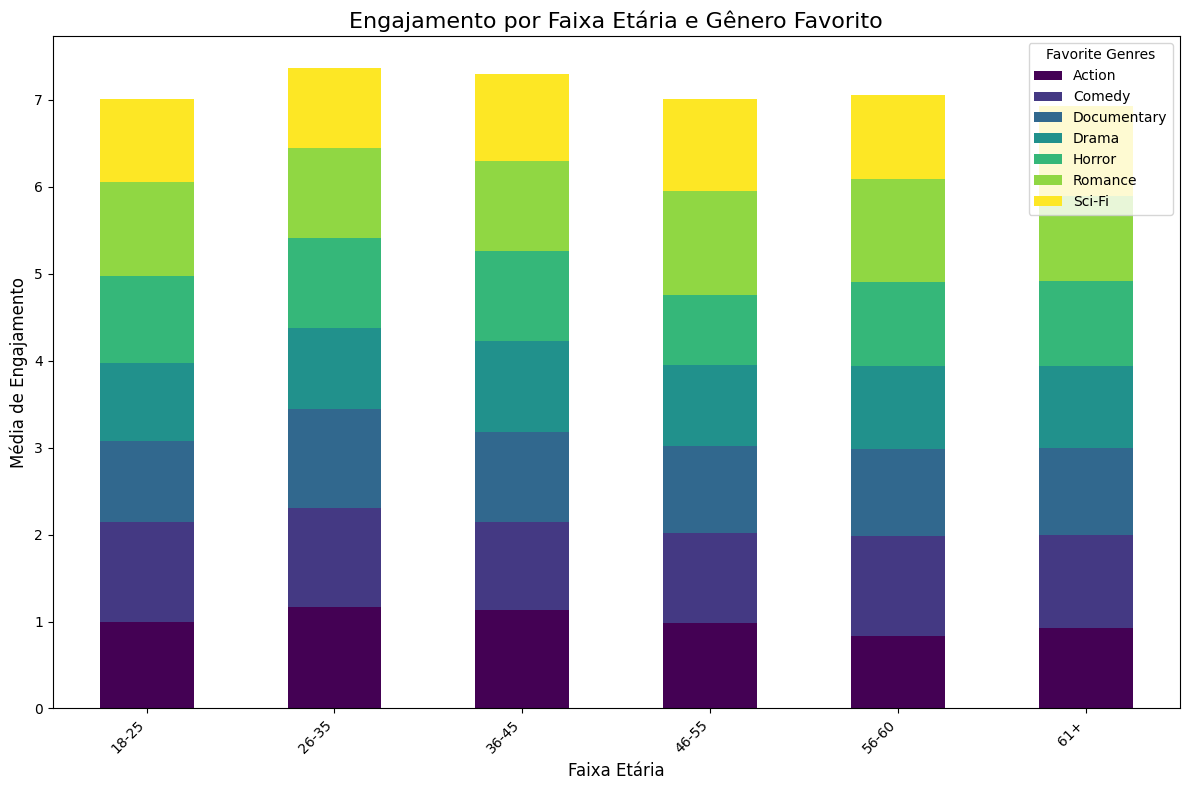

In [26]:
# Agrupando os dados por faixa etária e gênero favorito
engajamento_por_genero_faixa_etaria = df.groupby(['Age Group', 'Favorite Genres'])['Engagement Metrics Numeric'].mean().unstack()

# Plotando o gráfico de engajamento por faixa etária e gênero favorito
engajamento_por_genero_faixa_etaria.plot(kind='bar', stacked=True, figsize=(12, 8), colormap='viridis')
plt.title('Engajamento por Faixa Etária e Gênero Favorito', fontsize=16)
plt.xlabel('Faixa Etária', fontsize=12)
plt.ylabel('Média de Engajamento', fontsize=12)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.tight_layout()
plt.show()

***Critérios***

***Valor p < 0,05 : Isso indica que há uma diferença significativa no engajamento entre as faixas etárias para um gênero específico.***

***Valor p ≥ 0,05 : Isso indica que não há diferença significativa.***

In [27]:
# Realizando o teste ANOVA para engajamento por faixa etária e gênero favorito
grupo_engajamento = df.groupby(['Age Group', 'Favorite Genres'])['Engagement Metrics Numeric'].apply(list)

# Teste ANOVA
anova_result = stats.f_oneway(*grupo_engajamento)
print(f"Estatística F: {anova_result.statistic}")
print(f"Valor p: {anova_result.pvalue}")

Estatística F: 0.5713358445916468
Valor p: 0.9871233366290465


C:\Users\55119\AppData\Local\Temp\ipykernel_25804\2048415301.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grupo_engajamento = df.groupby(['Age Group', 'Favorite Genres'])['Engagement Metrics Numeric'].apply(list)


C:\Users\55119\AppData\Local\Temp\ipykernel_25804\3074380932.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df['Customer Support Interactions'], y=df['Feedback/Ratings'], palette='Set2')


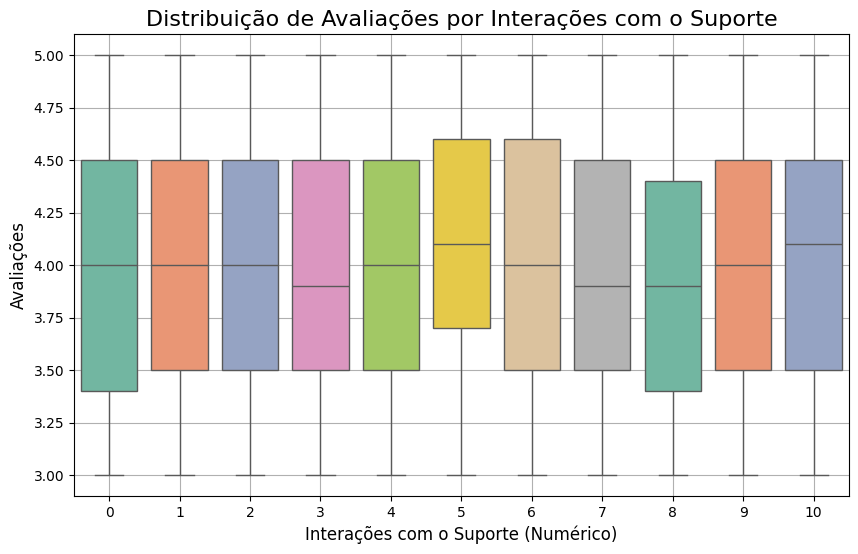

In [28]:
# Qual a distribuição de avaliações (comentarios) pelos usuarios com as interações com o suporte

# Gráfico de caixa para visualização das distribuições
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['Customer Support Interactions'], y=df['Feedback/Ratings'], palette='Set2')
plt.title('Distribuição de Avaliações por Interações com o Suporte', fontsize=16)
plt.xlabel('Interações com o Suporte (Numérico)', fontsize=12)
plt.ylabel('Avaliações', fontsize=12)
plt.grid(True)
plt.show()

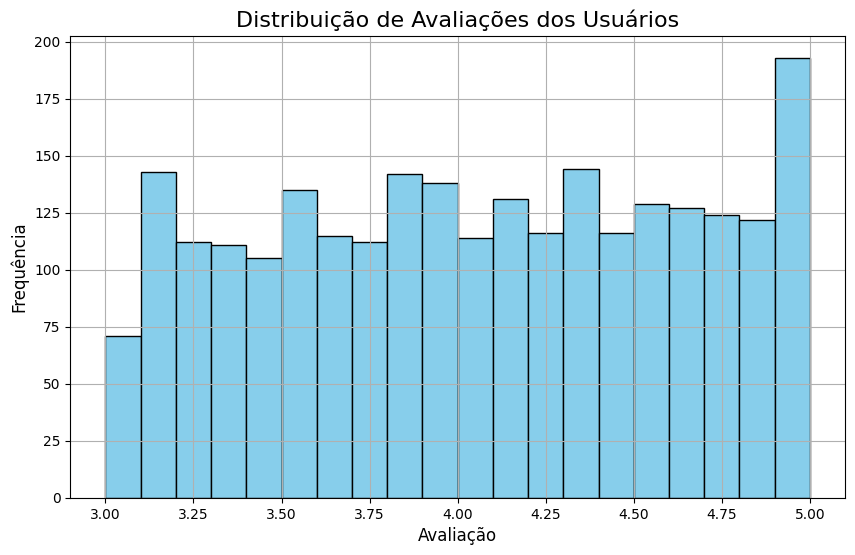

In [29]:
# Qual tipo de plano, tem maior interação com o suporte

plt.figure(figsize=(10, 6))
df['Feedback/Ratings'].plot(kind='hist', bins=20, color='skyblue', edgecolor='black')
plt.title('Distribuição de Avaliações dos Usuários', fontsize=16)
plt.xlabel('Avaliação', fontsize=12)
plt.ylabel('Frequência', fontsize=12)
plt.grid(True)
plt.show()

C:\Users\55119\AppData\Local\Temp\ipykernel_25804\2258790272.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df['Customer Support Interactions'], y=df['Subscription Plan'], palette='Set2')


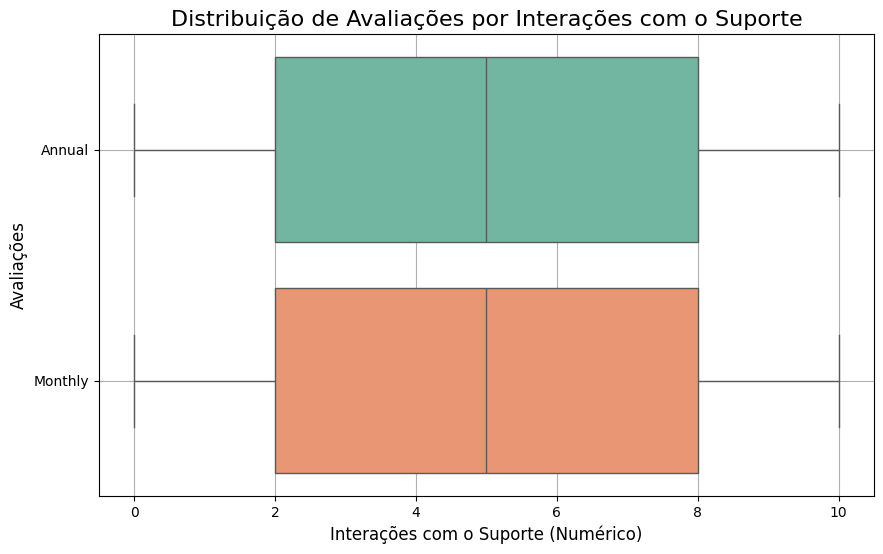

In [30]:
# Gráfico de caixa para visualização das distribuições
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['Customer Support Interactions'], y=df['Subscription Plan'], palette='Set2')
plt.title('Distribuição de Avaliações por Interações com o Suporte', fontsize=16)
plt.xlabel('Interações com o Suporte (Numérico)', fontsize=12)
plt.ylabel('Avaliações', fontsize=12)
plt.grid(True)
plt.show()

Devices Used
Smartphone    867
Tablet        853
Smart TV      780
Name: count, dtype: int64


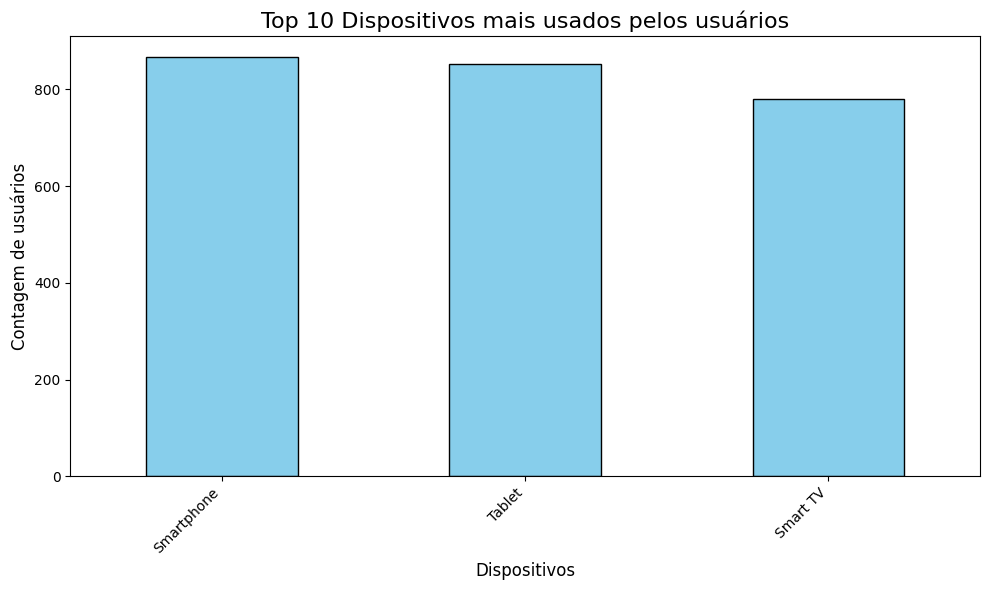

In [31]:
# Quais são os dispositivos mais usados pelos usuarios, o tipo de dispositivos tem influencia no nível de engajamento?

# Contagem de dispositivos mais usados
dispositivos_mais_usados = df['Devices Used'].value_counts()

# Exibindo os 10 dispositivos mais usados
print(dispositivos_mais_usados.head(10))

# Plotando a distribuição de dispositivos mais usados
plt.figure(figsize=(10, 6))
dispositivos_mais_usados.head(10).plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Top 10 Dispositivos mais usados pelos usuários', fontsize=16)
plt.xlabel('Dispositivos', fontsize=12)
plt.ylabel('Contagem de usuários', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

C:\Users\55119\AppData\Local\Temp\ipykernel_25804\1647611183.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df['Engagement Metrics Numeric'], y=df['Devices Used'], palette='Set2')


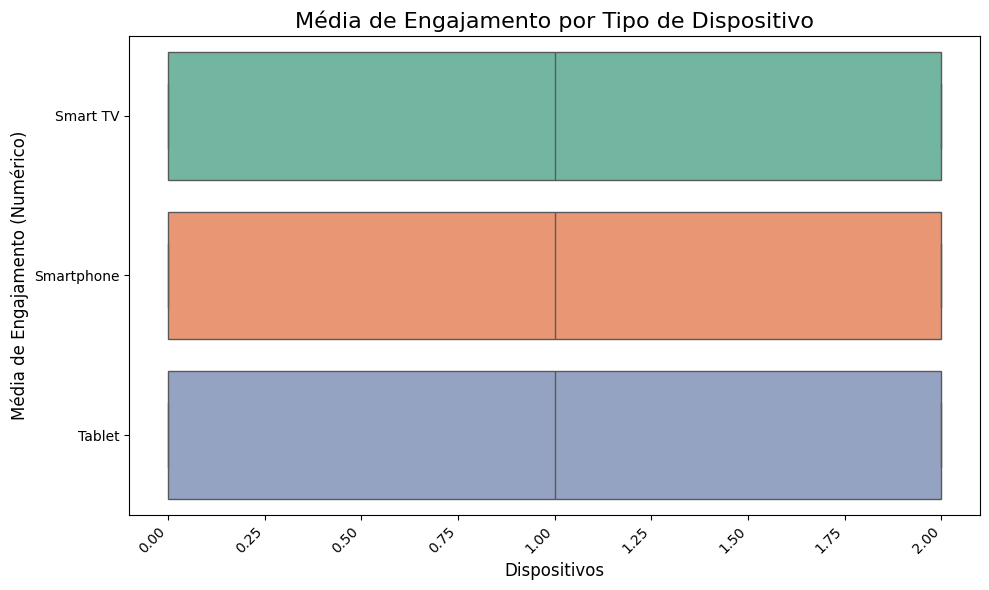

In [32]:


plt.figure(figsize=(10, 6))
sns.boxplot(x=df['Engagement Metrics Numeric'], y=df['Devices Used'], palette='Set2')
plt.title('Média de Engajamento por Tipo de Dispositivo', fontsize=16)
plt.xlabel('Dispositivos', fontsize=12)
plt.ylabel('Média de Engajamento (Numérico)', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

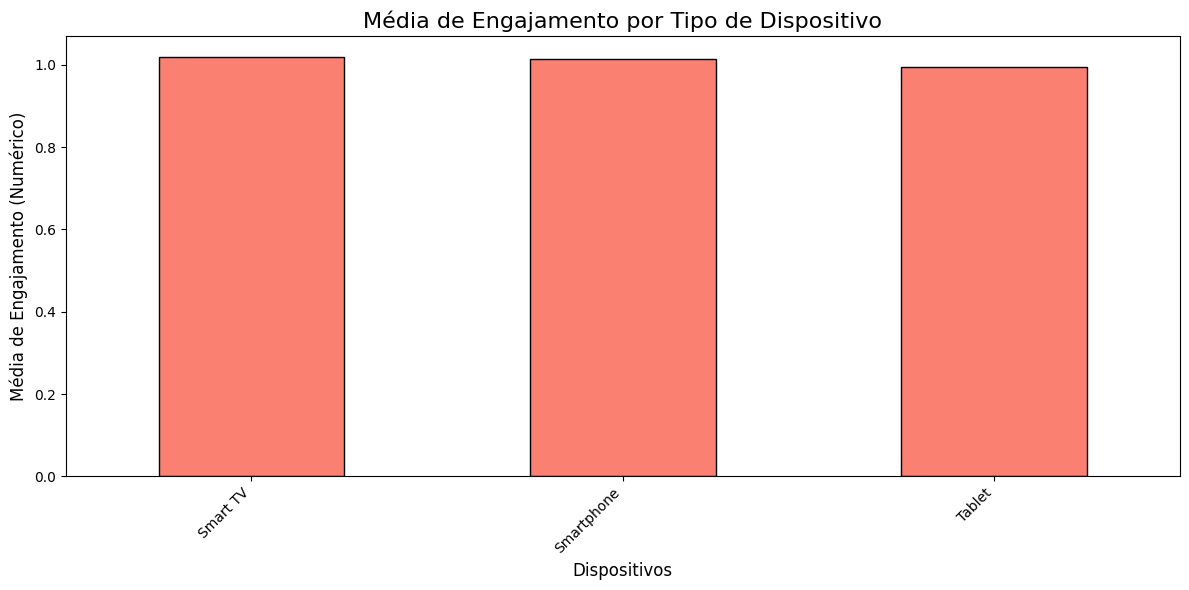

In [33]:
# Agrupando por dispositivo e calculando a média de engajamento
engajamento_por_dispositivo = df.groupby('Devices Used')['Engagement Metrics Numeric'].mean()

# Plotando o gráfico para visualizar a relação entre dispositivo e engajamento
plt.figure(figsize=(12, 6))
engajamento_por_dispositivo.sort_values(ascending=False).plot(kind='bar', color='salmon', edgecolor='black')
plt.title('Média de Engajamento por Tipo de Dispositivo', fontsize=16)
plt.xlabel('Dispositivos', fontsize=12)
plt.ylabel('Média de Engajamento (Numérico)', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [34]:
# Filtrando os dados para os dispositivos
usuarios_smartphone = df[df['Devices Used'] == 'Smartphone']['Engagement Metrics Numeric']
usuarios_smarttv = df[df['Devices Used'] == 'Smart TV']['Engagement Metrics Numeric']

# Verificando as médias
media_smartphone = usuarios_smartphone.mean()
media_smarttv = usuarios_smarttv.mean()
print(f'Média de engajamento para smartphone: {media_smartphone}')
print(f'Média de engajamento para Smart TV: {media_smarttv}')



Média de engajamento para smartphone: 1.0149942329873125
Média de engajamento para Smart TV: 1.0192307692307692


In [35]:
# Realizando o teste t de Student
t_stat, p_valor = stats.ttest_ind(usuarios_smartphone, usuarios_smarttv, equal_var=False)

print(f'Estatística t: {t_stat}')
print(f'Valor p: {p_valor}')

# Interpretando o valor p
if p_valor < 0.05:
    print("Há uma diferença estatisticamente significativa entre os usuários de smartphone e de Smart TV.")
else:
    print("Não há diferença estatisticamente significativa entre os usuários de smartphone e de Smart TV.")

Estatística t: -0.10512966385283821
Valor p: 0.9162858672002194
Não há diferença estatisticamente significativa entre os usuários de smartphone e de Smart TV.


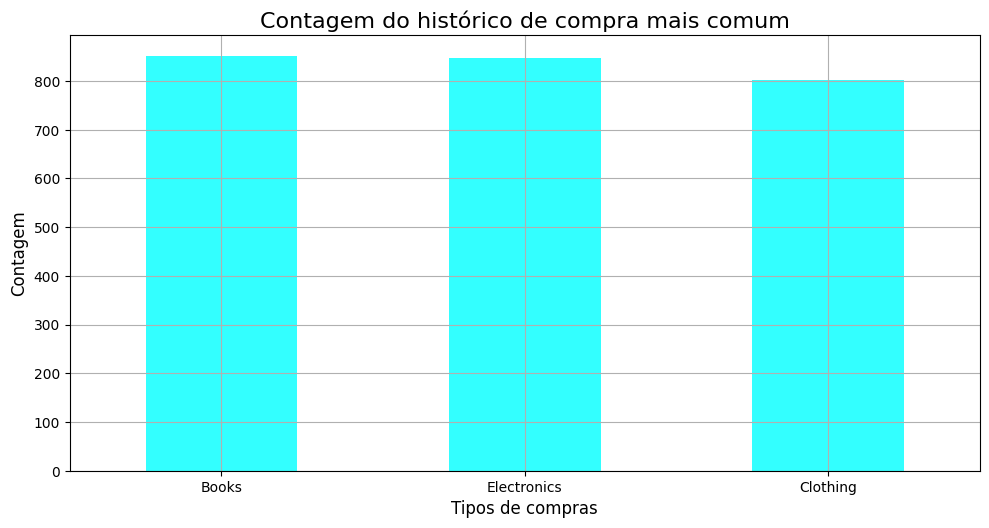

Purchase History
Books          851
Electronics    847
Clothing       802
Name: count, dtype: int64


In [39]:
# Qual é o tipo de histrico de compra mais comum entre os ususarios, usuarios com maior nivel de frequencia são os que mais compram e qual o tipo de pagamento mais utilizado?

# Verificando a distribuição dos tipos de pagamento
tipo_pagamento_mais_usado = df['Purchase History'].value_counts()

# Plotando o gráfico de distribuição dos genêros
plt.figure(figsize=(10,6))
tipo_pagamento_mais_usado.plot(kind='bar', color='Cyan', alpha=0.8)
plt.title('Contagem do histórico de compra mais comum', fontsize=16)
plt.xlabel('Tipos de compras', fontsize=12)
plt.ylabel('Contagem', fontsize=12)
plt.tight_layout()
plt.grid()
plt.xticks(rotation=0)
plt.show()

print(tipo_pagamento_mais_usado)

C:\Users\55119\AppData\Local\Temp\ipykernel_25804\1952330265.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Usage Frequency', y='Purchase History Numeric', data=df, palette='viridis')


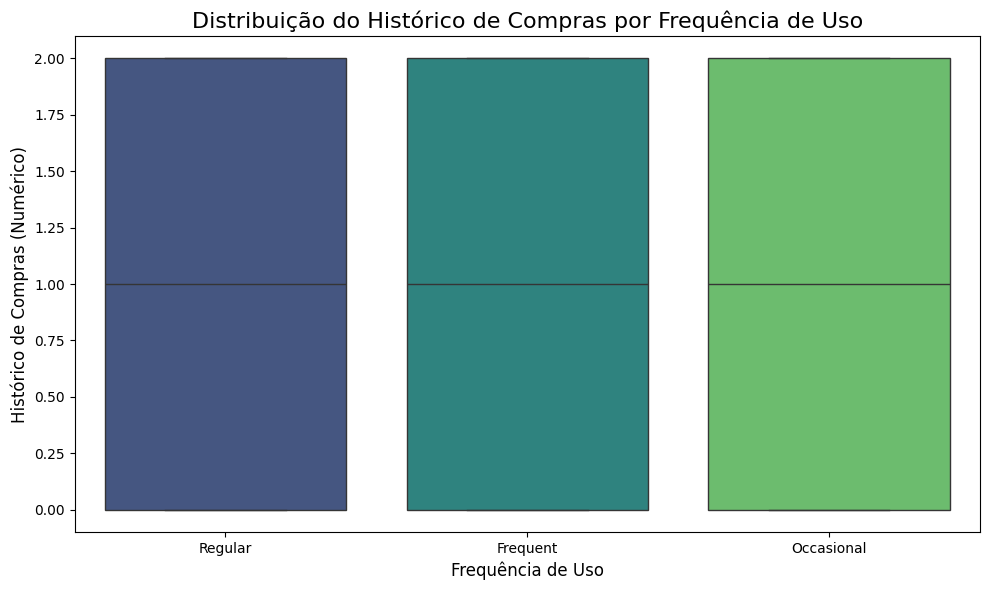

In [41]:
# Mapeando a coluna "Usage Frequency" para valores numéricos
df['Purchase History Numeric'] = df['Purchase History'].map({'Books': 0, 'Electronics': 1, 'Clothing':2})

# Criando um gráfico de boxplot para verificar a relação
plt.figure(figsize=(10, 6))
sns.boxplot(x='Usage Frequency', y='Purchase History Numeric', data=df, palette='viridis')
plt.title('Distribuição do Histórico de Compras por Frequência de Uso', fontsize=16)
plt.xlabel('Frequência de Uso', fontsize=12)
plt.ylabel('Histórico de Compras (Numérico)', fontsize=12)
plt.tight_layout()
plt.show()

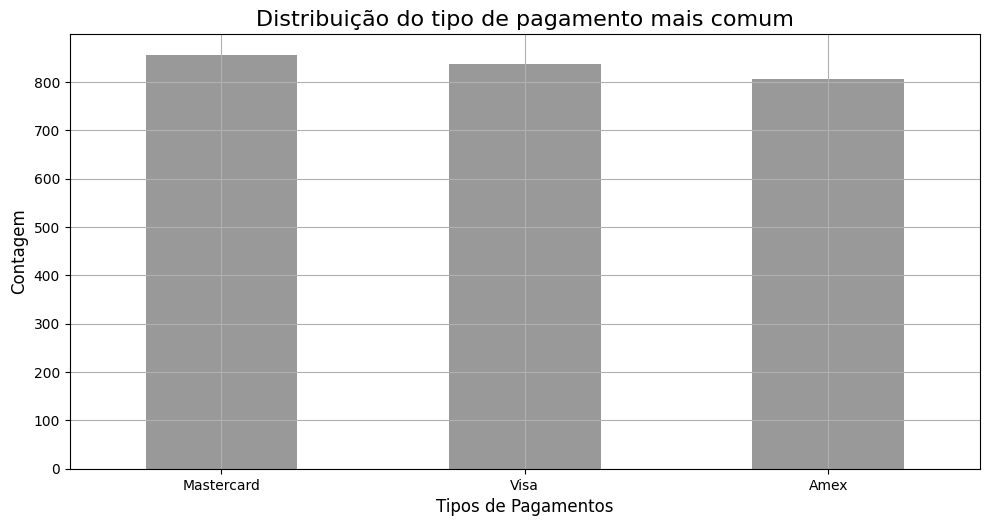

In [44]:
# Verificando o tipo de pagamento mais comum
tipo_pagamento = df['Payment Information'].value_counts()

# Plotando o gráfico de distribuição dos genêros
plt.figure(figsize=(10,6))
tipo_pagamento.plot(kind='bar', color='gray', alpha=0.8)
plt.title('Distribuição do tipo de pagamento mais comum', fontsize=16)
plt.xlabel('Tipos de Pagamentos', fontsize=12)
plt.ylabel('Contagem', fontsize=12)
plt.tight_layout()
plt.grid()
plt.xticks(rotation=0)
plt.show()

In [42]:
# Realizando o teste ANOVA
anova_result = stats.f_oneway(
    df[df['Usage Frequency'] == 'Manual']['Purchase History Numeric'],
    df[df['Usage Frequency'] == 'Frequent']['Purchase History Numeric'],
    df[df['Usage Frequency'] == 'Auto-renew']['Purchase History Numeric']
)

# Exibindo o resultado
print(f'ANOVA p-value: {anova_result.pvalue}')

ANOVA p-value: nan


c:\Users\55119\AppData\Local\Programs\Python\Python312\Lib\site-packages\scipy\stats\_stats_py.py:4133: DegenerateDataWarning: at least one input has length 0
  warnings.warn(stats.DegenerateDataWarning('at least one input '


In [45]:

nome_arquivo = "dados_tratados_com_insights.csv"

# Salvando o DataFrame no arquivo CSV
df_amazon = df.copy()

df_amazon.to_csv(nome_arquivo, index=False, encoding='utf-8')

***Conclusão***

1ª Qual é a distribuição dos gêneros, existe algum gênero com maior destaque?
2ª Qual a distribuição de idades, existe alguma faixa etária com maior nível de engajamento
3ª Existe algum país / local que possuem uma maior concentração de planos?
4ª Existe relação entre as metréticas de engajamento e plano de assinatura?
5ª Qual é a distribuição de gêneros por faixa etária.
6ª Existe relação entre o tempo de uso da plataforma com as métricas de engajamento?




Qual é a distribuição dos gêneros e como eles estão relacionados ao nível de engajamento?

R: A distribuição de gêneros não tem impacto direto no nível de engajamento, entretanto os homens possuem uma quantidade maior, as mulheres possuem um alto nível de engajamento, enquanto o público masculino lidera o nível médio e baixo dentro da plataforma.


Qual a distribuição de idades e qual faixa etária apresenta maior nível de engajamento e retenção?

R: A faixa etária com maior engajamento está entre 26-35 anos, apesar do publico 61+ possuir a maior distribuição entre os usúarios ela lidera o médio e o baixo nível de engajamento, as faixas de 18-25 e 50-60 possuem os níveis mais baixos por se tratar da distribuição dessas faixas na base de dados.


Quais países ou locais possuem maior concentração de planos e como variam as taxas de renovação de assinaturas por região?

R: Os dados revelam que existe predominância de planos em algumas localidades, entre os locais com a preferencia de planos mensais está, East Andrew, Jemesberg, Jamesshire e Lake Erik, e com a preferência anual está Kevinchester, Lake Angelaside, pode-se explicar essas preferências pela predominância de faixa etária e gêneros favoritos, em sumo as outras localidades tendem a apresentar um domínio nos planos mensais, os usuários tendem a preferir a opção de Auto-renew do que a renovação manual de planos, o que pode ser esperado pela praticidade e pelos usuários já conhecerem os benefícios.

Qual é a relação entre as estatísticas de engajamento e os diferentes tipos de planos de assinatura (mensal vs anual)?

R: O gráfico boxplot juntamente com o teste t-student relata que não existe diferença estatística entre os diferentes planos de assinatura e seu engajemnto.


Como os gêneros de conteúdo favoritos variam entre as faixas etárias, e como isso afeta o engajamento?

R: Embora o engajamento médio não varie muito entre as faixas etárias, as preferências de gênero sim, como os gêneros de horror, drama e documentários, entre as faixa etárias de 26-35 e 36-45.


Qual a distribuição de  avaliações (comentários) pelos usuários com as interações com o suporte?

R: Em resumo, a satisfação geral dos usuários com o suporte é alta, mas a consistência das avaliações pode variar conforme o número de interações. Isso sugere que enquanto a experiência global é positiva

Qual tipo de plano, tem maior interação com o suporte?

R: Em geral os dados indicam que não existe diferença entre os planos.

Quais são os dispositivos mais usados pelos usuários, o tipo de dispositivos tem influencia no nível de engajamento?

R: Não existe diferença estatística que comprove sustente que determinado dispositivo tenha impacto no engajamento.

Qual é o tipo de histórico de compra mais comum entre os usuários, usuários com maior nível de frequência são os que mais compram e qual o tipo de pagamento mais utilizado?

R: Books e Eletrônicos, aparecem como sendo os históricos comuns dos usuários, a frequência não causa impacto no volume de compras, sendo os tipos de pagamento mais comuns as bandeiras (Mastercard e Visa).



***Recomendações:***

***Insights***

A análise revelou características e padrões importantes no comportamento dos usuários, oferecendo uma base sólida para decisões estratégicas. Seguem os principais insights extraídos:

Engajamento por Gênero e Idade :

As mulheres possuem maior nível de engajamento na plataforma, enquanto os homens dominam os níveis médios e baixos de engajamento.
Os usuários da faixa etária de 26 a 35 anos apresentam o maior nível de engajamento e retenção, embora a faixa 61+ seja a mais numerosa entre os usuários, mas com predominância em níveis médios e baixos de engajamento.
Distribuição Geográfica e Tipos de Planos :

Preferências por planos variam regionalmente: localidades como East Andrew e Jamesshire preferem planos mensais, enquanto Kevinchester e Lake Angelaside têm maior adesão a planos anuais.
Não há diferenças significativas no engajamento entre usuários de planos mensais e anuais, indicando que a escolha do plano é mais influenciada pela conveniência do impacto no uso.
Gêneros de Conteúdo e Engajamento :

Gêneros de conteúdo favoritos, como terror, drama e documentários, variam significativamente entre faixas etárias, especialmente entre usuários de 26 a 35 e 36 a 45 anos.
Apesar disso, as variações nos gêneros favoritos não impactam diretamente os níveis de engajamento médio.
Interações com o Suporte :

A satisfação geral com o suporte é alta, mas há variação na consistência das avaliações conforme o número de interações. Isso pode indicar que a qualidade do suporte é percebida como positiva, mas poderia ser mais consistente.
Uso de Dispositivos e Engajamento :

Os dispositivos mais utilizados são Smart TVs e Smartphones. Contudo, não há evidências estatísticas de que o tipo de dispositivo impacte diretamente o nível de engajamento.
Histórico de Compras e Frequência de Uso :

Livros e Eletrônicos destacam-se como os históricos de compra mais comuns entre os usuários.
A frequência de uso (frequente ou regular) não afeta significativamente o volume de compras.
Os tipos de pagamento mais comuns são Mastercard e Visa, o que indica uma forte preferência por métodos de pagamento amplamente aceitos.
Recomendações Estratégicas
Engajamento e Retenção : Focar em estratégias para aumentar o engajamento de faixas etárias como 61+ e 18-25, que têm menor retenção. Personalização de conteúdos e campanhas específicas para essas faixas podem ser eficazes.
Planos de Assinatura : Incentivar planos anuais em regiões com maior adesão a planos mensais, comunicando benefícios de custo e praticidade.
Suporte ao Cliente : Investir em treinamento para melhorar a consistência do suporte, garantindo altos níveis de satisfação independentemente do número de interações.
Dispositivos e Conteúdo : Explore mais a integração com dispositivos populares como Smart TVs e Smartphones, oferecendo funcionalidades exclusivas que podem aumentar o engajamento.
Histórico de Compras e Métodos de Pagamento : Expandir categorias de conteúdo como Livros e Eletrônicos, além de oferecer incentivos para compras com métodos alternativos de pagamento, aumentando a conveniência dos usuários.